# Description of Study
We looked at cluster 3 in the last case study. Lets try and see how cluster 1 is different. As a reminder, here is the performance discrepency.

![caption](k_4_performance_graphs.png)

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())
teams = pd.read_pickle('C:/Users/musta/Desktop/Fall 2020/Thesis/thesis_soccer/processed_data/teams.pkl.gz')

<AxesSubplot:title={'center':'Hierarchical Clustering Centroids'}>

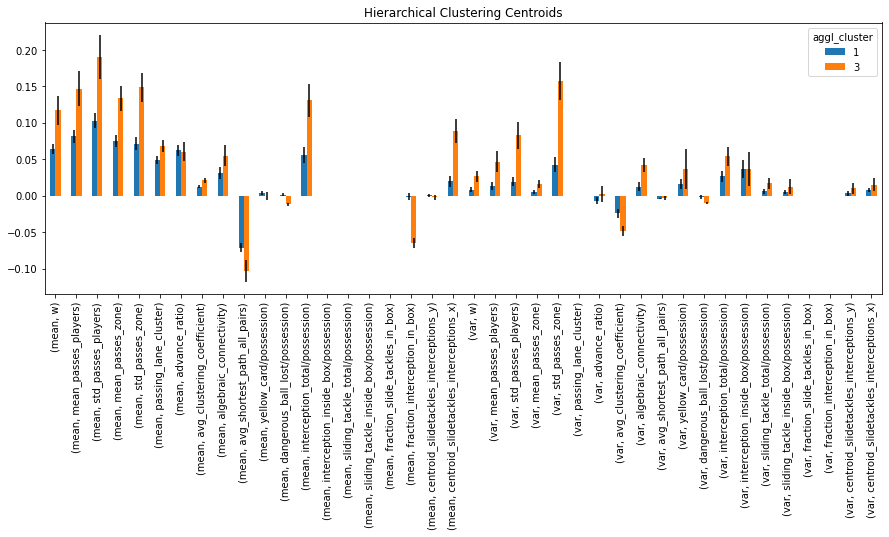

In [41]:
df_assignments = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_assignments.pkl.gz'))
scaled_data = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_data.pkl.gz'))
scaled_data = scaled_data.loc[scaled_data['aggl_cluster'].isin([1, 3])]

errors = scaled_data.groupby('aggl_cluster').apply(pd.DataFrame.sem).iloc[:, :-1]
scaled_data.groupby('aggl_cluster').mean().T.plot(yerr=errors.values, kind='bar', figsize=(15,5), title='Hierarchical Clustering Centroids')

## How are clusters 1 and 3 different in feature space?

Directionally they are very similar. However, the magnitudes are different. In particular, cluster 1 shows a lower degree of expressivity on passing metrics for zonal and player graphs than cluster 3. It also has a noticably lower centoid value for the mean X centroid for slide tackles/interceptions, and a high value for the fraction of all interceptions in the box; indicating they play closer to the goal than cluster 3 teams.


It also shows a significantly lower variance (indicating high consistency) compared to cluster 0 on the following:  

1) Std Passes Across Zones  
2) Std Passes Across Players  
3) Algebraic connectivity  

Since the mean values are also lower for these features, this tells us that these teams are consistencly performing low on these metrics.  

Its interesting to note that on average thealgebraic connectivity is higher in cluster 3, but it also has a higher game to game variance.

## What about teams in here?

In [42]:
df_assignments.loc[df_assignments.index==1].sort_values(by='rank')

,name,area.name,avg_pass_per_game,avg_shots_per_game,end_of_season_pts,goals_scored,goals_conceded,GD,rank,pezzali,conversion_rate
cluster,,,,,,,,,,,
1,Barcelona,Spain,612.105263,13.210526,2.447368,2.605263,0.763158,70,1.0,2.071840,0.178221
1,Juventus,Italy,566.289474,12.657895,2.500000,2.263158,0.631579,62,1.0,1.298187,0.160045
1,PSG,France,629.157895,14.684211,2.447368,2.842105,0.763158,79,1.0,1.589880,0.159919
1,Manchester United,England,509.789474,12.263158,2.131579,1.789474,0.736842,40,2.0,1.756791,0.150571
1,Real Madrid,Spain,581.078947,16.605263,2.000000,2.473684,1.157895,50,3.0,0.895705,0.135813
1,Tottenham Hotspur,England,552.315789,14.947368,2.026316,1.947368,0.947368,38,3.0,1.118992,0.130490
1,Roma,Italy,502.289474,15.710526,2.026316,1.605263,0.736842,33,3.0,1.012240,0.086618
1,Olympique Lyonnais,France,486.815789,13.263158,2.052632,2.289474,1.131579,44,3.0,1.216111,0.162656
1,Internazionale,Italy,538.157895,14.105263,1.894737,1.736842,0.789474,36,4.5,1.096307,0.105895


This is a lot more mixed. But still, 10/15 teams are in top 5.  

Its interesting there is no team from Germany in this cluster.  

If we separate the top 10 teams here from the bottom 5, we can compare both the groups independently with cluster 0 for insights.

<AxesSubplot:>

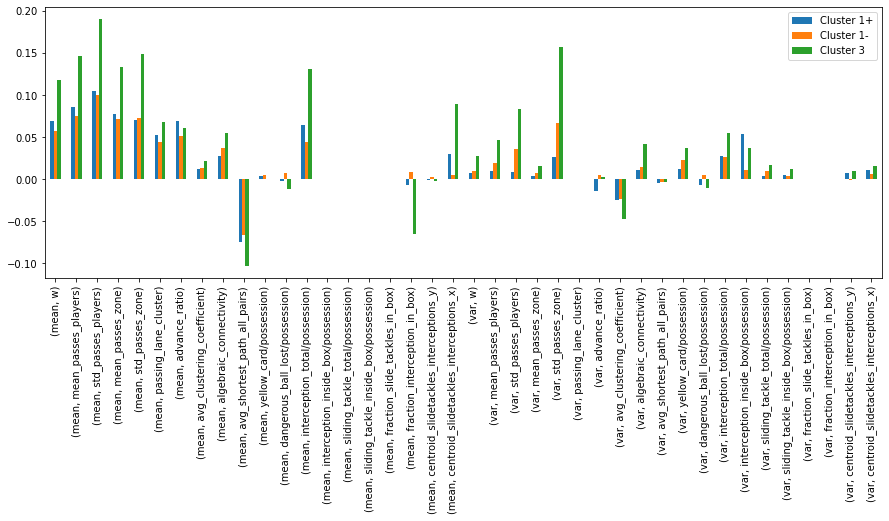

In [81]:
top10 = df_assignments.loc[(df_assignments.index==1) & (df_assignments['rank']<5), 'name']
bottom5 = df_assignments.loc[(df_assignments.index==1) & (df_assignments['rank']>=5), 'name']

top10 = teams.loc[teams['name'].isin(top10.values), 'wyId']
bottom5 = teams.loc[teams['name'].isin(bottom5.values), 'wyId']

top10 = scaled_data.drop(columns=['aggl_cluster']).loc[top10]
bottom5 = scaled_data.drop(columns=['aggl_cluster']).loc[bottom5]

df = pd.concat([top10.mean(), bottom5.mean(), scaled_data.groupby('aggl_cluster').mean().loc[3]],
         keys=['Cluster 1+', 'Cluster 1-', 'Cluster 3'], axis=1)

df.plot(kind='bar', figsize=(15,5))

### Remarks

Within cluster 1, the top 10 teams ranked 5 or above (1+) are not significantly different from the bottom 5 teams (1-), especially when compared with cluster 0 (which only had teams ranked 5 or above). This is indicating that this cluster is indeed a distinct playing style, not simply a measure of skill.

However, cluster 1 has a mix of teams, which means the play style represented by cluster 1 is not a guarantee of table domination. That being said, the worst team here is ranked 10.

This is unlike cluster 3, where there were only 5 teams, each ranking in the top 4.